# **SECTION I - ML History & Learning Categories**

---

This interactive notebook aims to provide an introductory understanding of machine learning for those who have knowledge in statistics, linear algebra, and calculus. **NOTE: As deep learning is a whole study in of itself, this notebook will not cover deep learning topics even though deep learning is a subset of machine learning. Learn more about deep learning in this notebook: [Intro to Deep Learning](https://colab.research.google.com/drive/1qLozuGpTj4Yc93MhL82hZK00I83lt9DR?usp=sharing)**

<h2>§1.1 - Machine Learning History</h2>
In 1959, Arthur Samuel, a computer scientist and pioneer of artificial intelligence, coined the term "Machine Learning" as 

> *the study that gives computers the ability to learn without being explicitly programmed.*

Many others, like Samuel, dreamed of a machine capable of learning. After all, computers have already surpassed humans in solving math equations, precisely controlling robotics, storing information, etc. The next step is allowing machines to learn for themselves. Nine years prior, computer scientist Alan Turing proposed that a computer can be said to possess artificial intelligence if it can mimic human responses under specific conditions. In other words, a computer is artificially intelligent if it passes the **Turing Test**. A more technical definition given by Tom M. Mitchell in 1997:

> *A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E.*

<h2>§1.2 - Learning Categories</h2>
Before a machine can accurately predict on its own, it needs to go through a learning or training phase in order to develop a model. There are 3 main ways a machine can learn:
 
*   Supervised Learning
*   Unsupervised Learning
*   Reinforcement Learning

<h3>§1.2.1 - Supervised Learning</h3>
In supervised learning, the machine experiences the examples along with the labels or targets for each example. The labels in the data help the algorithm to correlate the features. Two of the most common supervised machine learning tasks are classification and regression. §II will introduce different types of regression and §V will introduce different types of classification.

In classification problems, the machine must learn to predict discrete values. Namely, the machine must predict the most probable category, class, or label for new examples. Applications of classification include:

*   predicting whether a stock's price will rise or fall,
*   deciding if a news article belongs to the politics or leisure section,
*   classifying if a cancer cell is malignant or benign, etc.

In regression problems, the machine must predict the value of a continuous response variable. Examples of regression problems include:

*    predicting the sales for a new product,
*    estimating the weather on a certain day,
*    the salary for a job based on its description, etc.

<h3>§1.2.2 - Unsupervised Learning</h3>
Unsupervised learning is exactly what it sounds: training a model without providing target data. The machine will need to find correlations between the data using methods called clustering, in which similar examples are grouped together.

<h3>§1.2.3 - Reinforcement Learning</h3>
Reinforcement learning refers to goal-oriented algorithms, which learn how to attain a complex objective (goal) or maximize along a particular dimension over many steps. This method allows machines and software agents to automatically determine the ideal behavior within a specific context in order to maximize its performance. Simple reward feedback is required for the agent to learn which action is best; this is known as the reinforcement signal.

# **Section II - Types of Regression**

---

<h2>§2.1 - Linear Regression</h2>
Linear regression is used to predict a dependent variable $\hat{y}$ from an indepedent variable $x$. The slope $m$, and the initial condition $b$ are also given in order to produce:

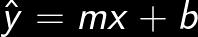

<h2>§2.2 - Calculating Errors</h2>
The performance of the model will be evaluated by calculating the error of the $i$th example:

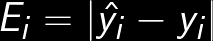

The absolute value makes sure the error cannot be negative in any circumstances. However, an individual error value for a certain example does not accurately show the overall picture of the model's performance. The Mean Absolute Error (MAE) will be used to calculate the average of all errors.

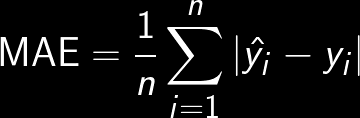

A more popular way of calculating the loss of a model is using the Mean Squared Error (MSE) formula. MSE is more preferred than MAE as it emphasizes the accuracy of the model and is used in gradient descent [§3.1.1].

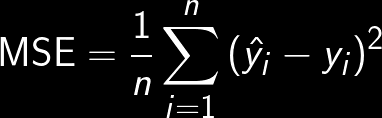

Below are 2 functions that implement MAE and MSE in Python:

In [4]:
def MAE(predicted, actual) -> float:
    meanError = 0
    if len(predicted) != len(actual):
        print("Datasets are not equal in length.")
        return -1
    for i in range(len(actual)):
        meanError += abs(predicted[i] - actual[i])
    return meanError / len(actual)

def MSE(predicted, actual) -> float:
    squaredError = 0
    if len(predicted) != len(actual):
        print("Datasets are not equal in length.")
        return -1
    for i in range(len(actual)):
        squaredError += (predicted[i] - actual[i]) ** 2
    return squaredError / len(actual)

# ignore floating-point precision error
print(MAE([1, 4.5, 3.14, 7, 9, 0.01], [1, 5, 3, 7, 9, 0]))
print(MSE([1, 4.5, 3.14, 7, 9, 0.01], [1, 5, 3, 7, 9, 0]))

0.10833333333333335
0.04495000000000001


<h2>§2.3 - Logistic Regression</h2>
Logistic Regression is used when the response variable is not normally distributed. When the outcome is binary (ex. heads/tails, yes/no, alive/dead, etc.), logistic regression is used for predicting the possibility of either event happening. It does not have to be limited to chance either. Logistic regression can also be used for classifying an object into 2 categories. Because of this, the predicted result's range will be constrained to [0, 1]. Since a linear function has no range restrictions, a sigmoid function is needed to shrink the range of the linear function down to [0, 1].

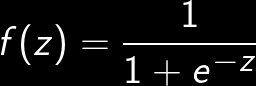

where $z$ is the linear function:

CodeCogsEqn (3).png

and $w₀$ is the initial condition, $w₁$ is the amount of change for each additional unit. Thus, the sigmoid function then becomes:

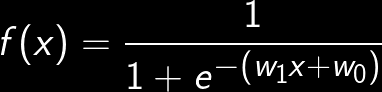

<h3>§2.3.1 Logistic Regression with More Than 2 Outcomes</h3> Logistic regression can not only be used for binary possibilities. For example, suppose a student wants to improve their SAT score. For each additional hour practiced $x$, the student will improve by 10 points. This results in a linear function $z$:

CodeCogsEqn (2).png

However, what the linear model fails to take into consideration is the fact that the SAT is not evenly distributed, meaning that the student will have a period of slow growth, followed by accelerated improvement. Furthermore, as the student's score approaches 1600 (perfect score), progress once again halts. Below shows a sigmoid function which takes the above into consideration:

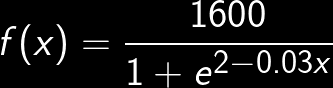

Notice the numerator for the logistic model can be changed to account for the range of the function. In this case, 1600 will be numerator as that is the maximum attainable score on the SAT. The Python code below shows the predicted SAT score the student will receive if they study a certain amount of hours:

In [2]:
#@markdown Input the amount of hours the student has studied.
import math # for exponential function

def sigmoid(numOfHours):
    linearFunc = 2 - 0.03 * numOfHours
    # cast to int as SAT scores are whole numbers
    return int(1600 // (1 + math.exp(linearFunc)))

Number_of_Hours = 71 #@param {type:"slider", min:1, max:320, step:1}
print("The student will receive a score of {}".format(sigmoid(Number_of_Hours)) 
    + " on the SAT if they study for {} hours.".format(Number_of_Hours))

The student will receive a score of 851 on the SAT if they study for 71 hours.


Plotting out the sigmoid above and the linear function $z = 10x$, one can see the two to be very similar in nature. But how is the linear function calculated to be $z = 20 - 0.03x$? The real challenge is to find the right coefficients or **weights ($w₀, w₁, 20, 0.3,$ etc.),** which will be discussed in the next section.

# **Section III - Minimalizing Errors**

---

As discussed above, finding the right weights will be the main focus of machine learning. One method of finding accurate weights is to compute the **cost** (average of all errors) and attempt to reduce it.

<h2>§3.1 - Cost Function</h2>
The cost function $J(w)$ shows the loss of the overall model by calculating the error for each example and averaging them out. 

<h3>§3.1.1 - Linear Cost Function</h3>
For linear regression, the cost function is simply the half of MSE [§2.2].

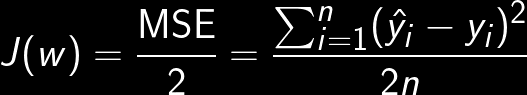

Why is MSE being halved? For gradient descent, the cost function needs to be easily differentiable and dividing MSE by 2 will cancel out the power rule of the squared term.

<h3>§3.1.2 - Logistic Cost Function</h3>
The cost function for logistic regression is slightly more complicated. MSE cannot be used for a sigmoid function, as the resulting function would be non-convex, which is not optimal for gradient descent. Ensuring the cost function has a continuous path down to the global minimum allows gradient descent to be as efficient as possible. In order to ensure the cost function is convex (and therefore ensure convergence to the global minimum), the cost function is transformed using the logarithm of the sigmoid function. The cost function for logistic regression is:

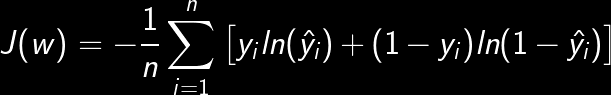

<h2>§3.2 - Gradient Descent</h2>
Gradient descent is an iterative algorithm used to find the global minimum of a cost function. If the global minimum is reached, the error will also be at a minimum. Using the weights at the global minimum would result in the most accurate predictions.

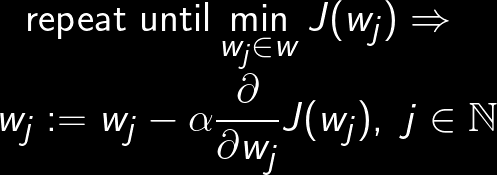

The general form of gradient descent allows for any number of weights to be updated (hence $j ∈ ℕ$). 

<h3>§3.2.1 - Learning Rate</h3>
In gradient descent, alpha ($α$) stands for the learning rate, which is a tuning parameter that determines the step size at each iteration. Having a learning rate that is too large would result in the algorithm skipping over the global minimum and converging too quickly. A learning rate that is too low would result in longer training times as it will take more steps to reach the global minimum. Having a fine-tuned learning rate is crucial to the success of gradient descent.

<h3>§3.2.2 - Python Implementation</h3>
Gradient descent is meant for machines after all. This mini-section will explain how to implement gradient descent in Python. First, import the appropriate libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

While having real-world data is prefered, for the purposes of this demonstration, random data will be generated for the sake of convenience.

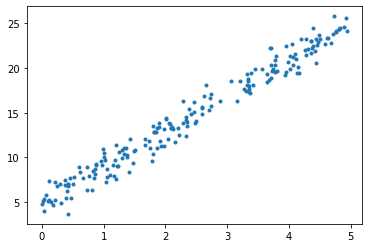

In [11]:
x = np.random.rand(200, 1) * 5
y = 5 + 4 * x + np.random.randn(200, 1) 
plt.plot(x, y, linestyle="", marker=".")
plt.show()

Looking at the data generation process above, it is apparent that the random data is generated about the line:

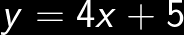

That said, can the machine successfully identify the line of best fit to be above? This question will be answered later on. Next, the cost function will need to be written. Recall from [§3.1.1] that the cost function for linear regression is just MSE divided by 2. Remember, the weights should result in 5 for the bias and 4 for the slope. This is also where gradient descent should converge. Before gradient descent can be implemented, there is one more step: calculating the partial derivative of the cost function.

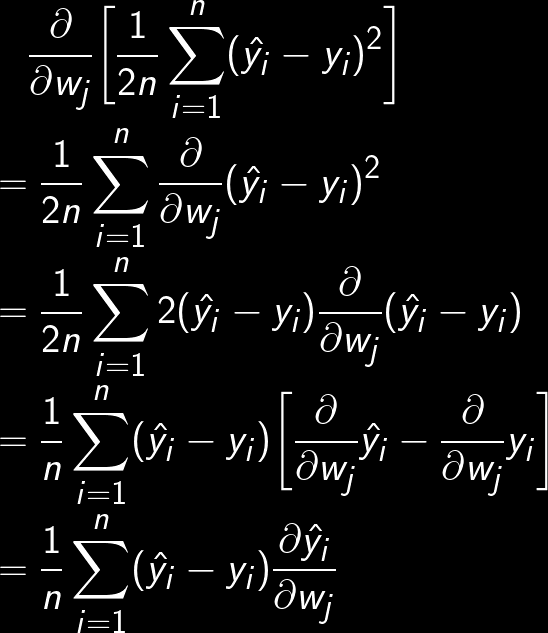

First, extract the denominator out of the partial derivative to apply linearity, next apply the chain rule on the squared term. Finally, one of the derivatives is 0 because as partial differentiation states: all but one variable shall remain constant. The process isn't done yet, as the general form of the partial derivative above accounts for any number of weights. For this example, two weights are used:

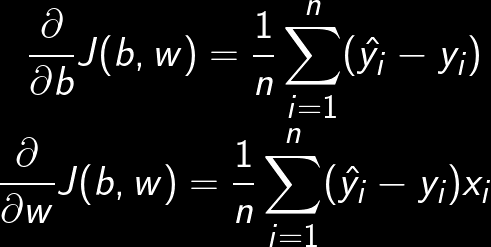

Now, the derivative can be numerically calculated by Python:

In [9]:
def linear_gradient_descent(inputs, actualValues, learning_rate, iter) -> tuple:
    # initialize weight and bias
    weight = np.random.uniform(0, 1)
    bias = np.random.uniform(0, 0.5)
    weights = []
    costs = []

    for i in range(iter):
        # using linear model y = wx + b
        predicted = weight * inputs + bias

        # cost function for linear regression is MSE / 2
        cost = MSE(predicted, actualValues) / 2

        # store costs and weights
        costs.append(cost)
        weights.append(weight)

        # updating weights and bias
        bias_derivative = sum(predicted-actualValues) / float(len(inputs))  
        weight_derivative = sum(inputs*(predicted-actualValues)) / float(len(inputs))
        weight -= learning_rate * weight_derivative
        bias -= learning_rate * bias_derivative
      
    return weight, bias, costs[-1][-1]

Next, the gradient descent function above will be called along with a plot of the predicted line of best fit superimposed on the randomly generated data. Adjust the amount of iterations and the learning rate to get a more accurate prediction.

Iterations:    154
Learning Rate: 0.01
Estimated Weight (w): 4.680776008707474
Estimated Bias (b):   2.777182736074007
Final cost/MSE:       1.169621765595126
Predicted model: y = 4.681x + 2.777


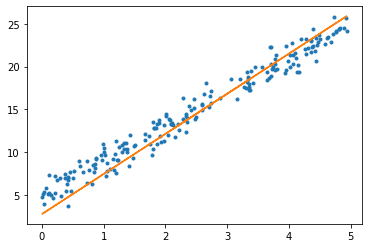

In [12]:
iterations = 154 #@param {type:"slider", min:1, max:200, step:1}
alpha = 0.01 #@param {type:"slider", min:0.01, max:0.1, step:0.01}
est_weight, est_bias, final_cost = linear_gradient_descent(x, y, alpha, iterations) 
print(f"Iterations:    {iterations}\nLearning Rate: {alpha}")
print("==========================================")
print(f"Estimated Weight (w): {est_weight[0]}\nEstimated Bias (b):   {est_bias[0]}")
print(f"Final cost/MSE:       {final_cost}")
print("==========================================")
print("Predicted model: y = {:0.3f}x + {:0.3f}".format(est_weight[0], est_bias[0]))
plt.plot(x, y, linestyle="", marker=".")
plt.plot(x, est_weight*x+est_bias, linestyle='solid')
plt.show()

The graph above demonstrates how gradient descent successfully predicted the line of best fit for a certain dataset. One important thing to note is that the machine will never be able to predict the original function ($y = 4x + 5$) which will require infinite training which is obviously not possible. The same can also be applied for logistic regression, which has a slightly different cost function and gradient descent. First, random data will be generated with respect to a sigmoid (which conveniently has the same weights as before):

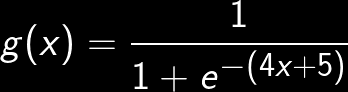

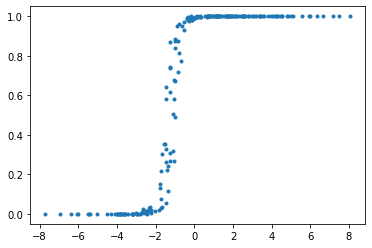

In [6]:
x = np.random.randn(200, 1) * 3
y = 1 / (1 + np.exp(-5 - 4 * x + np.random.randn(200, 1)))
plt.plot(x, y, linestyle="", marker=".")
plt.show()

The cost function for logistic regression will be the function described in [§3.1.2]:

In [7]:
def logisticCost(predicted, actual) -> float:
    log_y1 = actual * np.log(predicted)
    log_y0 = (1-actual) * np.log(1-predicted)
    return -sum(log_y1 + log_y0) / len(actual)

As usual, before the gradient descent function can be implemented, the derivative for the logistic cost function needs to be calculated. Before that can happen, the derivative of the sigmoid function needs to be calculated first:

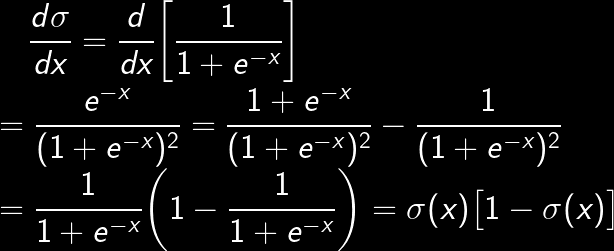

Knowing the derivative of the sigmoid, the following demonstrates how to find the gradient of the cost function:

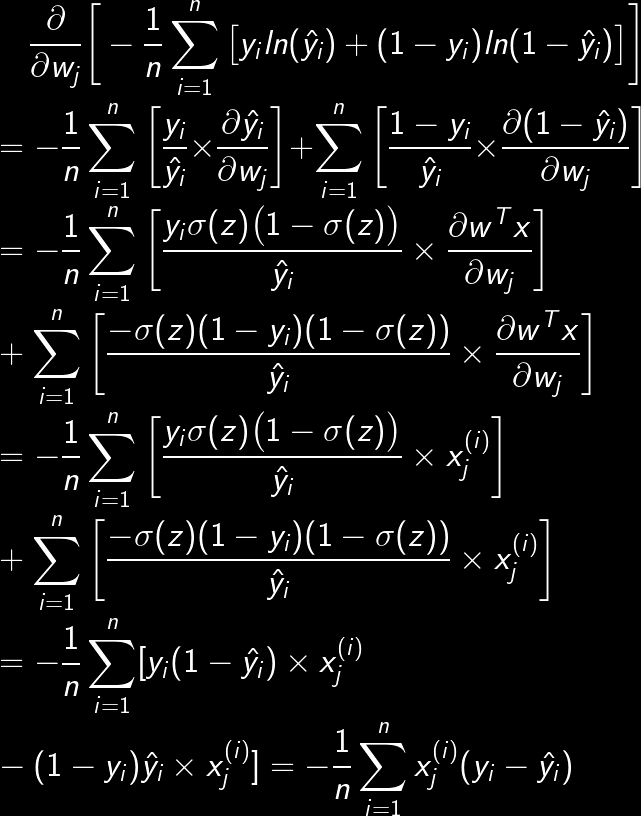

In [9]:
def logistic_gradient_descent(inputs, actualValues, learning_rate, iter) -> tuple:
    # initialize weight and bias
    weight = np.random.uniform(0, 1)
    bias = np.random.uniform(0, 0.5)
    weights = []
    costs = []

    for i in range(iter):
        # use sigmoid model
        predicted = 1 / (1 + np.exp(-weight * inputs - bias))

        # use logistic cost function
        cost = logisticCost(predicted, actualValues) 
        
        # store cost and weights
        costs.append(cost)
        weights.append(weight)

        # use gradient calculated above
        bias_derivative = sum(predicted-actualValues) / float(len(inputs))
        weight_derivative = sum(inputs*(predicted-actualValues)) / float(len(inputs)) 
        weight -= learning_rate * weight_derivative
        bias -= learning_rate * bias_derivative

    return weight, bias, costs[-1][-1]

This time, each iteration will be displayed so the machine's "thinking" process can be seen clearly.

Iterations:    700
Learning Rate: 0.1
Estimated Weight: 2.218437213723356
Estimated Bias:   2.4659576302667388
Final Cost:       0.09684300647816245
Predicted model: y = 1 / (1 + e^-(2.218x + 2.466))


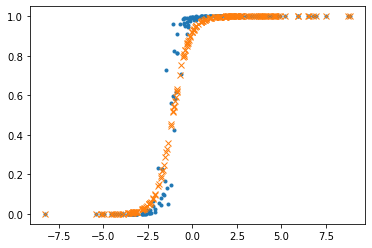

In [10]:
for iterations in range(1, 701):
    est_weight, est_bias, final_cost = logistic_gradient_descent(x, y, 0.1, iterations) 
    print(f"Iterations:    {iterations}\nLearning Rate: 0.1")
    print("==============================================")
    print(f"Estimated Weight: {est_weight[0]}\nEstimated Bias:   {est_bias[0]}")
    print(f"Final Cost:       {final_cost}")
    print("==============================================")
    print("Predicted model: y = 1 / (1 + e^-({:0.3f}x + {:0.3f}))".format(est_weight[0], est_bias[0]))
    plt.plot(x, y, linestyle="", marker=".")
    plt.plot(x, 1 / (1 + np.exp(-est_weight*x-est_bias)), linestyle='', marker="x")
    plt.show()
    clear_output(wait=True)

For the graph above, the orange "X" represents the machine's prediction while the blue dots represent the raw data. It does require more iterations to fit to the data correctly, but has a lower overall cost.

# **Section IV - Overfitting & Underfitting**

---

There are times where a model might seem like a fit for the data provided but does not generalize well for new data. These instances are when the model either overfits or underfits. First, two terms to take note:


*   **Bias** - Assumptions made by a model to make a function easier to learn.
*   **Variance** - Occurs when new data inputted has a higher error than the data used for training.

<h2>§4.1 - Underfitting</h2>
Underfitting occurs when the model cannot capture the underlying trend of the data. Underfitting destroys the accuracy of the machine learning model. Its occurrence simply means that the model or the algorithm does not fit the data well enough. In such cases, the rules of the ML model are too easy and flexible to be applied on such minimal data and therefore the model will probably make a lot of wrong predictions. Underfitting can be avoided by using more data and also reducing the features by feature selection. In essence, underfitting has high bias and low variance. Techniques to reduce underfitting:



1. Increase model complexity.
2. Increase the number of features, performing feature engineering.
3. Remove noise from the data.
4. Increase the number of epochs or increase the duration of training to get better results.


<h2>§4.2 - Overfitting</h2>
Overfitting is a bit more complicated. When a model gets trained with so much data, it starts learning from the noise and inaccurate data entries. The model does not categorize the data correctly, because of too many details and noise. The causes of overfitting are the non-parametric and non-linear methods because these types of machine learning algorithms have more freedom in building the model based on the dataset and therefore they can really build unrealistic models. In short, overfitting has low bias and high variance. Ways to diminish overfitting:

1. **Reduce the number of features**: Manually select which features to keep.
2. **Regularization**: Keep all the features, but reduce the magnitude of the weights. Regularization works well when all the features are somewhat useful.
3. **Early stopping**: Stop gradient descent early as more iterations does not necessarily yield better results.

<h2>§4.3 - Regularization</h2>
Regularization is a method for adding additional constraints or penalty to a model, with the goal of preventing overfitting and improving generalization. There are 2 variants of the penalty term: L1 and L2. The differences between L1 regularization and L2 regularization are similar to the differences between MAE and MSE. The L1 penalty term aims to minimize the absolute value of the weights. L1 penalty term highlighted in magenta:

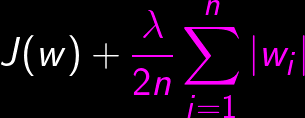

The L2 penalty aims to minimize the squared magnitude of the weights. L2 penalty term highlighted in magenta:

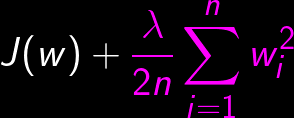

L2 regularization shrinks all the coefficients by the same proporations but does not eliminate any. L1 regularization can shrink some coefficients down to 0, which effectively removes it. This is called feature selection.

# **Section V - Types of Classification Algorithms**

---

Looking back to [§1.2.1], classification algorithms help categorize data into distinct groups through the algorithms described below.

<h2>§5.1 - Naïve Bayes</h2>
Naive Bayes classifiers are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. Bayes’ theorem states the following relationship, given class variable $y$ and dependent feature vector $\vec{x}$:

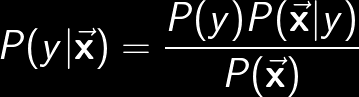

Using the naive conditional independence assumption that:

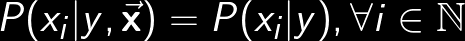

this relationship is simplified to:

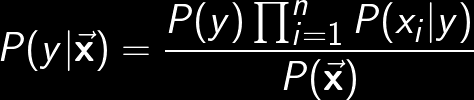

Since the probability of the dependent feature vector is constant given the input, the following classification rule can be used:

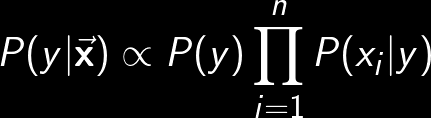

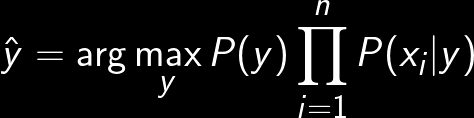

then use Maximum A Posteriori (MAP) estimation to estimate the relative frequency of class $y$ in the training set.

<h2>§5.2 - k-Nearest Neighbors</h2>
k-Nearest Neighbors is a simple algorithm that stores all the available cases and classifies the new data or case based on a similarity measure. It is mostly used to classifies a data point based on how its neighbors are classified. It can be calculated using the Euclidean distance formula:

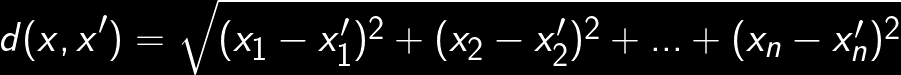

Finally, the input gets assigned to the class with the largest probability:

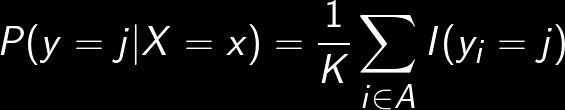

<h3>§5.2.1 - Python Implementation</h3>
First, import scipy and sklearn (numpy should be imported from [§3.2.2]) for required built-in functions:

In [12]:
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

Next, the euclidean distance function described above will be implemented as the sum of the squares of each set of data points, finally taking the square root:

In [13]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

The main core k-NN function will be implemented below:

In [14]:
def kNN(x_train, y, x_input, k):
    op_labels = []
     
    # Loop through the Datapoints to be classified
    for item in x_input: 
         
        # Array to store distances
        point_dist = []
         
        # Loop through each training data
        for j in range(len(x_train)): 
            distances = euclidean(np.array(x_train[j,:]) , item) 
            point_dist.append(distances) 

        point_dist = np.array(point_dist) 
         
        # Sorting the array while preserving the index
        # Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
         
        # Labels of the K datapoints from above
        labels = y[dist]
         
        # Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels

To test the above function, the iris dataset will be used from `sklearn`:

In [15]:
iris = load_iris()
X = iris.data
y = iris.target
 
# Creating the training Data
train_idx = xxx = np.random.randint(0, 150, 100)
X_train = X[train_idx]
y_train = y[train_idx]
 
# Creating the testing Data
test_idx = xxx = np.random.randint(0, 150, 50) #taking 50 random samples
X_test = X[test_idx]
y_test = y[test_idx]
 
y_pred = kNN(X_train, y_train, X_test, 9)
accuracy_score(y_test, y_pred)

1.0

With a `k`-value of only 9, the algorithm managed to classify the irises with a 90%+ accuracy rate.

<h2>§5.3 - Support Vector Machine</h2>
The SVM is one of the most popular and versatile supervised machine learning algorithm. It is used for both classification and regression tasks. The main objective of SVMs is to find the optimal hyperplane which linearly separates the data points in two components by maximizing the margin.

The advantages of support vector machines are:

- Effective in high dimensional spaces.

- Still effective in cases where number of dimensions is greater than the number of samples.

- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.

Different types of kernel functions (linear, polynomial, rbf, sigmoid):

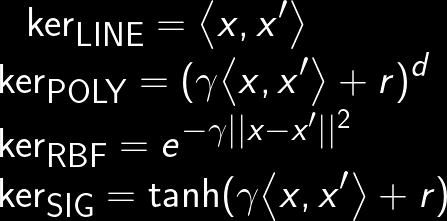

The penalty term $C$ controls the strength of said penalty, and as a result, acts as an inverse regularization parameter. The dual problem to the primal is:

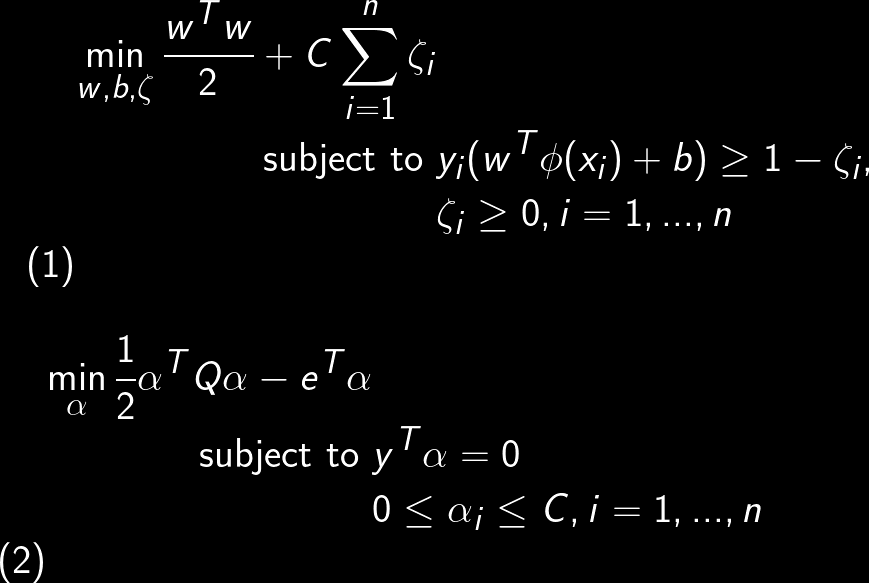

Once the optimization problem is solved, the output of the decision function for a given sample becomes:

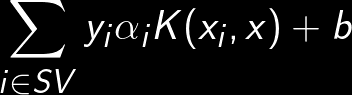

The primal problem can be equivalently formulated as:

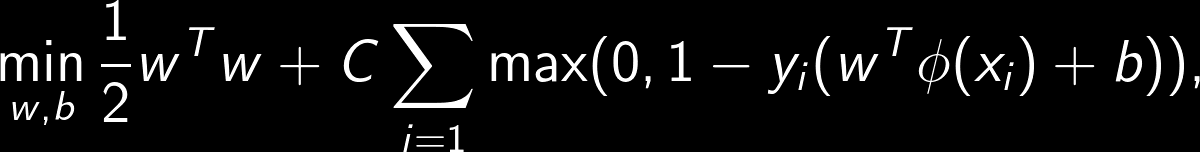

where it makes use of the hinge loss. This is the form that is directly optimized by `LinearSVC`, but unlike the dual form, this one does not involve inner products between samples, so the famous kernel trick cannot be applied. This is why only the linear kernel is supported.

<h3>§5.3.1 - Python Implementation</h3>
Starting with the Python code, first, the model needs to be fitted:

In [16]:
from sklearn import svm
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, Y)

SVC(decision_function_shape='ovo')

After being fitted, the model can then be used to predict new values:

In [17]:
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes: 4*3/2 = 6

6

That just about wraps up the classification algorithms every introductory ML student needs to know. This notebook is obviously NOT an exhaustive list of topics one needs to study for machine learning. Nonetheless, with the topics described above, it will be much easier to research new state-of-the-art topics knowing how fundamental tools can be applied. This just serves as a introduction for an otherwise intimidating interdisciplinary scientific field.